In [1]:
from deap import base, creator, tools, algorithms
import deap.benchmarks.tools as bt
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from numpy import pi
import operator
from matplotlib.ticker import MaxNLocator
#import pandas as pd

creator.create("obj", base.Fitness, weights=(-1.0))
creator.create("Ind", list, fitness=creator.obj)

In [2]:
checkpoint_file = "checkpoint.pkl"
with open(checkpoint_file, "rb") as cp_file:
    cp = pickle.load(cp_file)

In [3]:
cp["input_file"]

{'control_variables': {'radius_top': {'min': 0.05, 'max': 0.35},
  'radius_bot': {'min': 0.05, 'max': 0.35}},
 'evaluators': {'openmc_gc': {'order': 0,
   'input_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'fhr_plank_openmc.py'],
   'execute2': [['aprun -n 2 -d 64 --env OMP_NUM_THREADS=64 openmc-0.12.2']],
   'inputs': ['radius_top', 'radius_bot'],
   'output_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'fhr_plank_openmc_output.py'],
   'outputs': ['ppf', 'keff2'],
   'keep_files': 'all'}},
 'constraints': {'keff2': {'operator': ['>='], 'constrained_val': [1.36]}},
 'algorithm': {'objective': ['min'],
  'weight': [1.0],
  'optimized_variable': ['ppf'],
  'pop_size': 64,
  'generations': 5,
  'mutation_probability': 0.23,
  'mating_probability': 0.9,
  'selection_operator': {'operator': 'selNSGA2'},
  'parallel': 'theta',
  'mutation_operator': {'operator': 'mutPolynomialBounded',
   'eta': 0.23,
   'indpb': 0.23},
  'mating_operator': {'operator

In [4]:
def get_ind_list(pop_list, index):
    ind_list = [] 
    for pop in pop_list:
        ind_list.append(pop[index])
    return ind_list

In [5]:
def plot_1_obj(logbook, index, obj_name, short_name, save_fig, save_fig_title):
    gen = np.array(logbook.select("gen")[:-1]) + 1
    obj_avg = get_ind_list(logbook.chapters["oup"].select("avg"), index)[:-1]
    obj_std = get_ind_list(logbook.chapters["oup"].select("std"), index)[:-1]
    obj_min = get_ind_list(logbook.chapters["oup"].select("min"), index)[:-1]
    obj_max = get_ind_list(logbook.chapters["oup"].select("max"), index)[:-1]
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(figsize=(15,7))
    ax.errorbar(gen, obj_avg, yerr=obj_std, label="Ave "+ short_name, capsize=5)
    ax.plot(gen, obj_min, "*-", label="Min "+ short_name)
    ax.plot(gen, obj_max, "*-", label="Max "+ short_name)
    ax.set_xlabel("Generation [#]", fontsize=20)
    ax.set_ylabel(obj_name + " ("+short_name+") [-]", fontsize=16)
    ax.grid()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(obj_name + " Evolution", fontsize=24)
    if save_fig:
        plt.savefig(save_fig_title,bbox_inches='tight', dpi=300)

In [6]:
logbook = cp["logbook"]

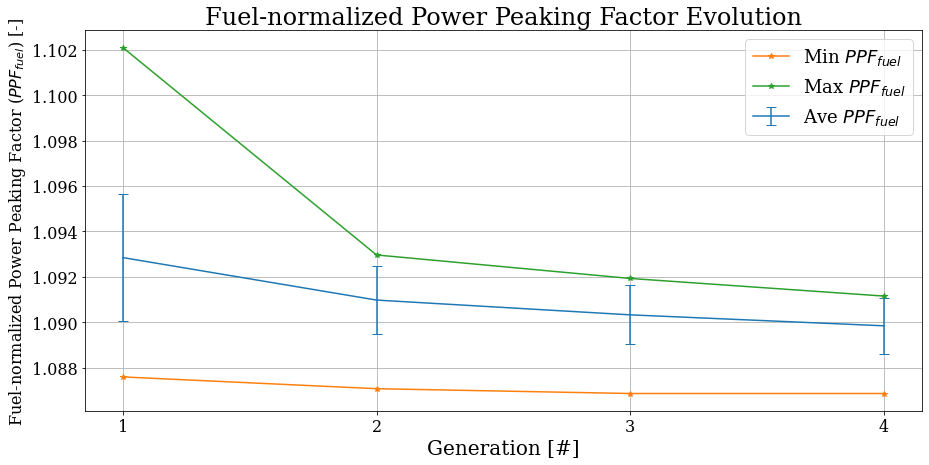

In [7]:
plot_1_obj(logbook, 0, "Fuel-normalized Power Peaking Factor", "$PPF_{fuel}$", True, "slab-obj-1-ppf-evol-coolant.png")



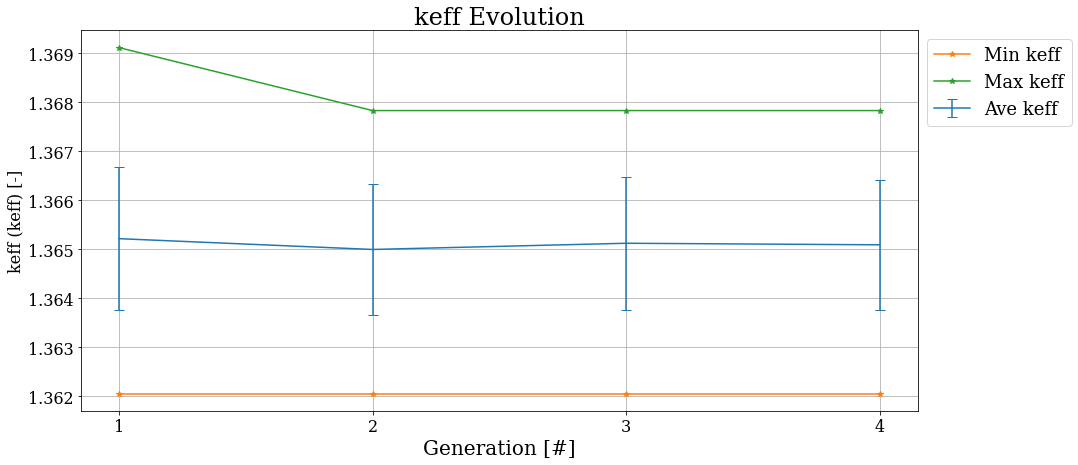

In [8]:
plot_1_obj(logbook, 1, "keff", "keff", False, "")

In [9]:
def plot_1_ind(logbook, index, obj_name, short_name, save_fig, save_fig_title):
    gen = logbook.select("gen")
    obj_avg = get_ind_list(logbook.chapters["ind"].select("avg"), index)
    obj_std = get_ind_list(logbook.chapters["ind"].select("std"), index)
    obj_min = get_ind_list(logbook.chapters["ind"].select("min"), index)
    obj_max = get_ind_list(logbook.chapters["ind"].select("max"), index)
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(figsize=(15,7))
    ax.errorbar(gen, obj_avg, yerr=obj_std, label="Ave "+ short_name, capsize=5)
    ax.plot(gen, obj_min, "*-", label="Min "+ short_name)
    ax.plot(gen, obj_max, "*-", label="Max "+ short_name)
    ax.set_xlabel("Generation", fontsize=20)
    ax.set_ylabel(obj_name, fontsize=20)
    ax.grid()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
    ax.set_title(obj_name + " Evolution", fontsize=20)
    if save_fig:
        plt.savefig(save_fig_title,bbox_inches='tight')

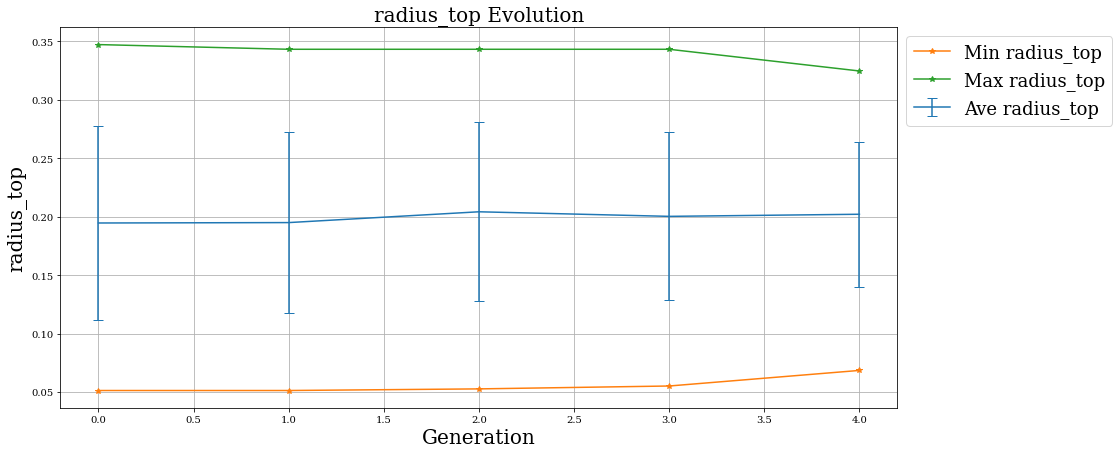

In [10]:
plot_1_ind(logbook, 0, "radius_top", "radius_top", False, "")

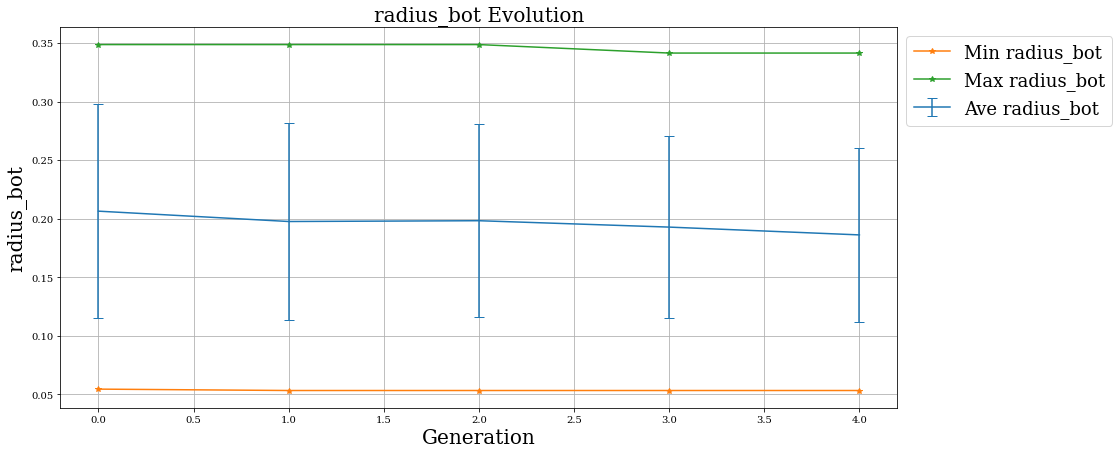

In [11]:
plot_1_ind(logbook, 1, "radius_bot", "radius_bot", False, "")

In [12]:
def calc(index):
    obj_avg = get_ind_list(logbook.chapters["ind"].select("avg"), index)
    obj_std = get_ind_list(logbook.chapters["ind"].select("std"), index)
    obj_min = get_ind_list(logbook.chapters["ind"].select("min"), index)
    obj_max = get_ind_list(logbook.chapters["ind"].select("max"), index)
    return obj_avg, obj_std, obj_min, obj_max

In [13]:
results = cp["all"]
oup_results = results["outputs"]
for i, pop in enumerate(results["populations"]):
    obj_0 = np.array([item[0] for item in oup_results[i]])
    sorted_index_0 = np.argsort(obj_0)
    if i > 1:
        print(i)
        for j, ind in enumerate(pop):
            if j in sorted_index_0[0:5]:
                print(oup_results[i][j][0], ind)

2
1.0868558089053268 [0.19993265911661962, 0.2575984122521763]
1.0870676757081723 [0.16608455626557025, 0.05312805506211163]
1.0872437478373311 [0.2374178032144285, 0.19966929616388074]
1.087586207890172 [0.24142943287416213, 0.08546886232702317]
1.087768999808731 [0.22410889175924953, 0.10686786466074165]
3
1.0868558089053268 [0.19993265911661962, 0.2575984122521763]
1.0868558089053268 [0.19993265911661962, 0.2575984122521763]
1.0870676757081723 [0.16608455626557025, 0.05312805506211163]
1.0870676757081723 [0.16608455626557025, 0.05312805506211163]
1.0872437478373311 [0.2374178032144285, 0.19966929616388074]
4
1.0868558089053268 [0.19993265911661962, 0.2575984122521763]
1.0868558089053268 [0.19993265911661962, 0.2575984122521763]
1.0868558089053268 [0.19993265911661962, 0.2575984122521763]
1.0870676757081723 [0.16608455626557025, 0.05312805506211163]
1.0870676757081723 [0.16608455626557025, 0.05312805506211163]


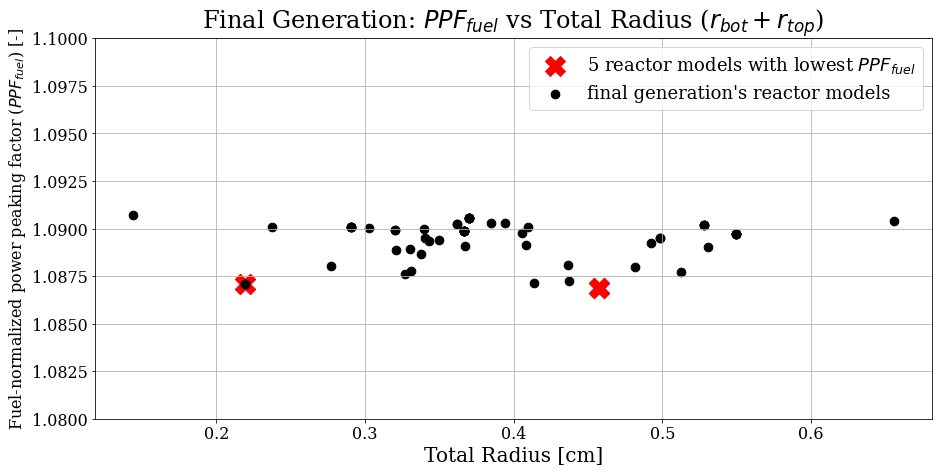

In [14]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(15,7))
radius_top = []      
radius_bot = []
ppf = []
pop = results["populations"][-1]
oups = results["outputs"][-1]
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            ax.scatter(ind[0]+ind[1], oup[0], marker='X', s=400, color="red",
                       label="5 reactor models with lowest $PPF_{fuel}$")
            count += 1
        else:
            ax.scatter(ind[0]+ind[1], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0 and count > 0:
            ax.scatter(ind[0]+ind[1], oup[0], marker='.', label="final generation's reactor models", s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[0]+ind[1], oup[0], marker='.', s=300, color="black")
ax.set_xlabel("Total Radius [cm]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel("Fuel-normalized power peaking factor ($PPF_{fuel}$) [-]", fontsize=16)
ax.grid()
ax.set_ylim(1.08, 1.10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
ax.set_title("Final Generation: $PPF_{fuel}$ vs Total Radius ($r_{bot} + r_{top}$)", fontsize=24)
plt.savefig("slab-obj-1-ppf-final-coolant.png",bbox_inches='tight', dpi=300)

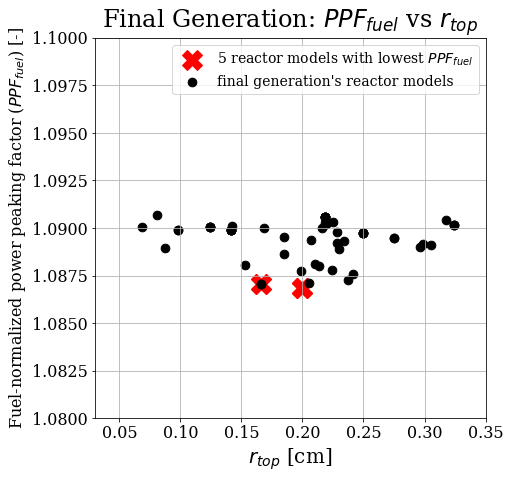

In [15]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(7,7))
radius_top = []      
radius_bot = []
ppf = []
pop = results["populations"][-1]
oups = results["outputs"][-1]
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            ax.scatter(ind[0], oup[0], marker='X', s=400, color="red",
                       label="5 reactor models with lowest $PPF_{fuel}$")
            count += 1
        else:
            ax.scatter(ind[0], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0 and count > 0:
            ax.scatter(ind[0], oup[0], marker='.', label="final generation's reactor models", s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[0], oup[0], marker='.', s=300, color="black")
ax.set_xlabel("$r_{top}$ [cm]", fontsize=20)
ax.set_xlim([0.03, 0.35])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel("Fuel-normalized power peaking factor ($PPF_{fuel}$) [-]", fontsize=16)
ax.grid()
ax.set_ylim(1.08, 1.10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
ax.set_title("Final Generation: $PPF_{fuel}$ vs $r_{top}$", fontsize=24)
plt.savefig("slab-obj-1-ppf-final-coolant-rtop.png",bbox_inches='tight', dpi=300)

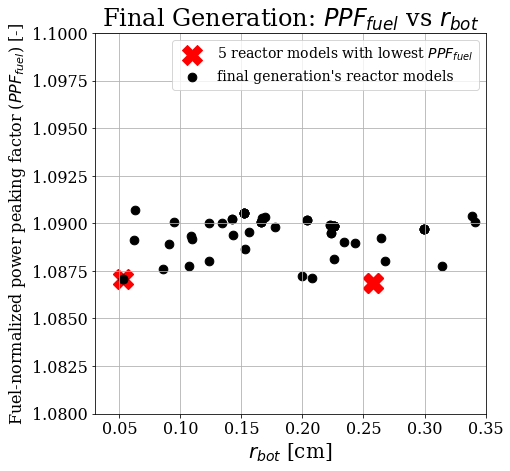

In [16]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(7,7))
radius_top = []      
radius_bot = []
ppf = []
pop = results["populations"][-1]
oups = results["outputs"][-1]
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            ax.scatter(ind[1], oup[0], marker='X', s=400, color="red",
                       label="5 reactor models with lowest $PPF_{fuel}$")
            count += 1
        else:
            ax.scatter(ind[1], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0 and count > 0:
            ax.scatter(ind[1], oup[0], marker='.', label="final generation's reactor models", s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[1], oup[0], marker='.', s=300, color="black")
ax.set_xlabel("$r_{bot}$ [cm]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel("Fuel-normalized power peaking factor ($PPF_{fuel}$) [-]", fontsize=16)
ax.set_xlim([0.03, 0.35])
ax.grid()
ax.set_ylim(1.08, 1.10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
ax.set_title("Final Generation: $PPF_{fuel}$ vs $r_{bot}$", fontsize=24)
plt.savefig("slab-obj-1-ppf-final-coolant-rbot.png",bbox_inches='tight', dpi=300)

Text(0.5, 1.0, "Final Generation's Reactor Models")

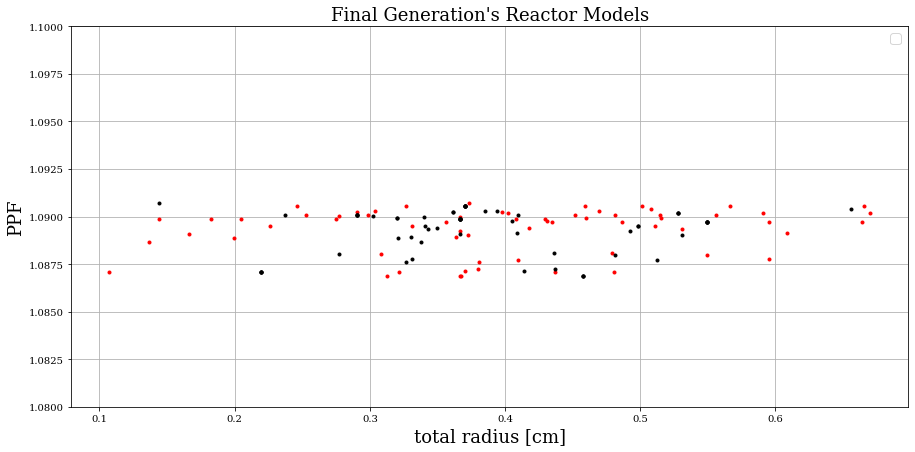

In [17]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(15,7))
radius_top = []      
radius_bot = []
ppf = []
pop = results["populations"][-1]
oups = results["outputs"][-1]
count, count2 = 0, 0
colors = ["red", "blue", "green", "yellow", "black"]
for j, pop in enumerate(results["populations"]):
    if j in [0, 4]:
        for i, ind in enumerate(pop):
            oup = oups[i]
            ax.plot(ind[0]+ind[1], oup[0], '.', color=colors[j])
ax.set_xlabel("total radius [cm]", fontsize=18)
ax.set_ylabel("PPF", fontsize=18)
ax.grid()
ax.set_ylim(1.08, 1.10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
ax.set_title("Final Generation's Reactor Models", fontsize=18)
#plt.savefig("slab-obj-1-ppf-final-coolant.png",bbox_inches='tight')